In [151]:
print("\u0905\u0928\u0940\u0936")

अनीश


In [132]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.tree import plot_tree
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from sklearn import tree

In [133]:
#data collection

In [134]:
df = pd.read_csv('./Admission_Predict_Ver1.1.csv')

In [135]:
#data description

In [136]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [137]:
#Shape
df.shape

(500, 9)

In [138]:
#Data wrangling

In [139]:
df = df.drop('Serial No.',axis=1)

In [140]:
df.shape

(500, 8)

In [141]:
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [142]:
#label encoding

In [143]:
df['Chance of Admit '] = [1 if each > 0.75 else 0 for each in df['Chance of Admit ']]
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,1
1,324,107,4,4.0,4.5,8.87,1,1
2,316,104,3,3.0,3.5,8.00,1,0
3,322,110,3,3.5,2.5,8.67,1,1
4,314,103,2,2.0,3.0,8.21,0,0


In [144]:
# This is the input feature matrix, where you've selected multiple columns from the DataFrame
x = df[['GRE Score', 'University Rating','CGPA']]
# This is the target variable (also known as the dependent variable)
y = df['Chance of Admit ']

In [145]:
#traing and testing

In [146]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25,random_state=12)

In [147]:
print(f"Size of splitted data")
print(f"x_train {x_train.shape}")
print(f"y_train {y_train.shape}")
print(f"y_train {x_test.shape}")
print(f"y_test {y_test.shape}")

Size of splitted data
x_train (375, 3)
y_train (375,)
y_train (125, 3)
y_test (125,)


Criterion: gini
Training Accuracy: 0.9146666666666666
Training Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.91      0.92       215
           1       0.89      0.92      0.90       160

    accuracy                           0.91       375
   macro avg       0.91      0.92      0.91       375
weighted avg       0.92      0.91      0.91       375

Testing Accuracy: 0.848
Testing Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.84      0.87        75
           1       0.78      0.86      0.82        50

    accuracy                           0.85       125
   macro avg       0.84      0.85      0.84       125
weighted avg       0.85      0.85      0.85       125



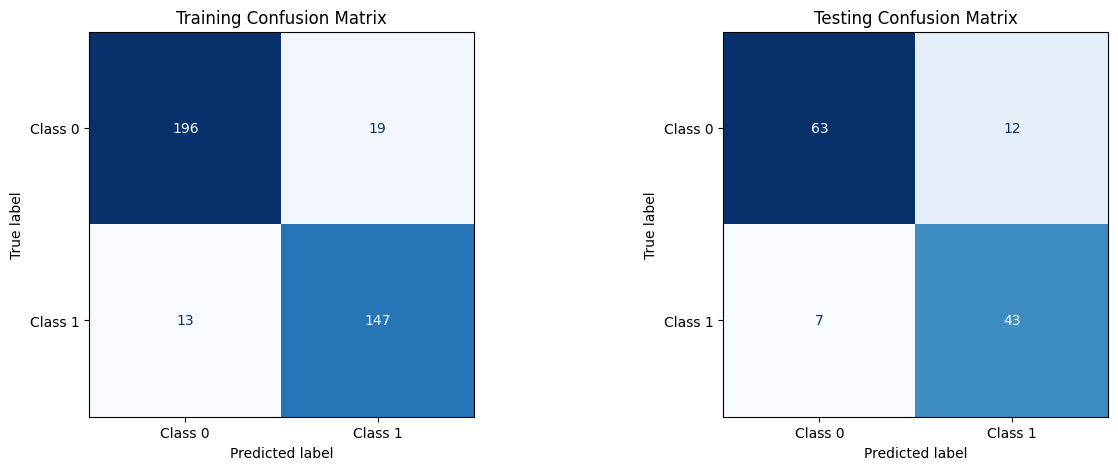

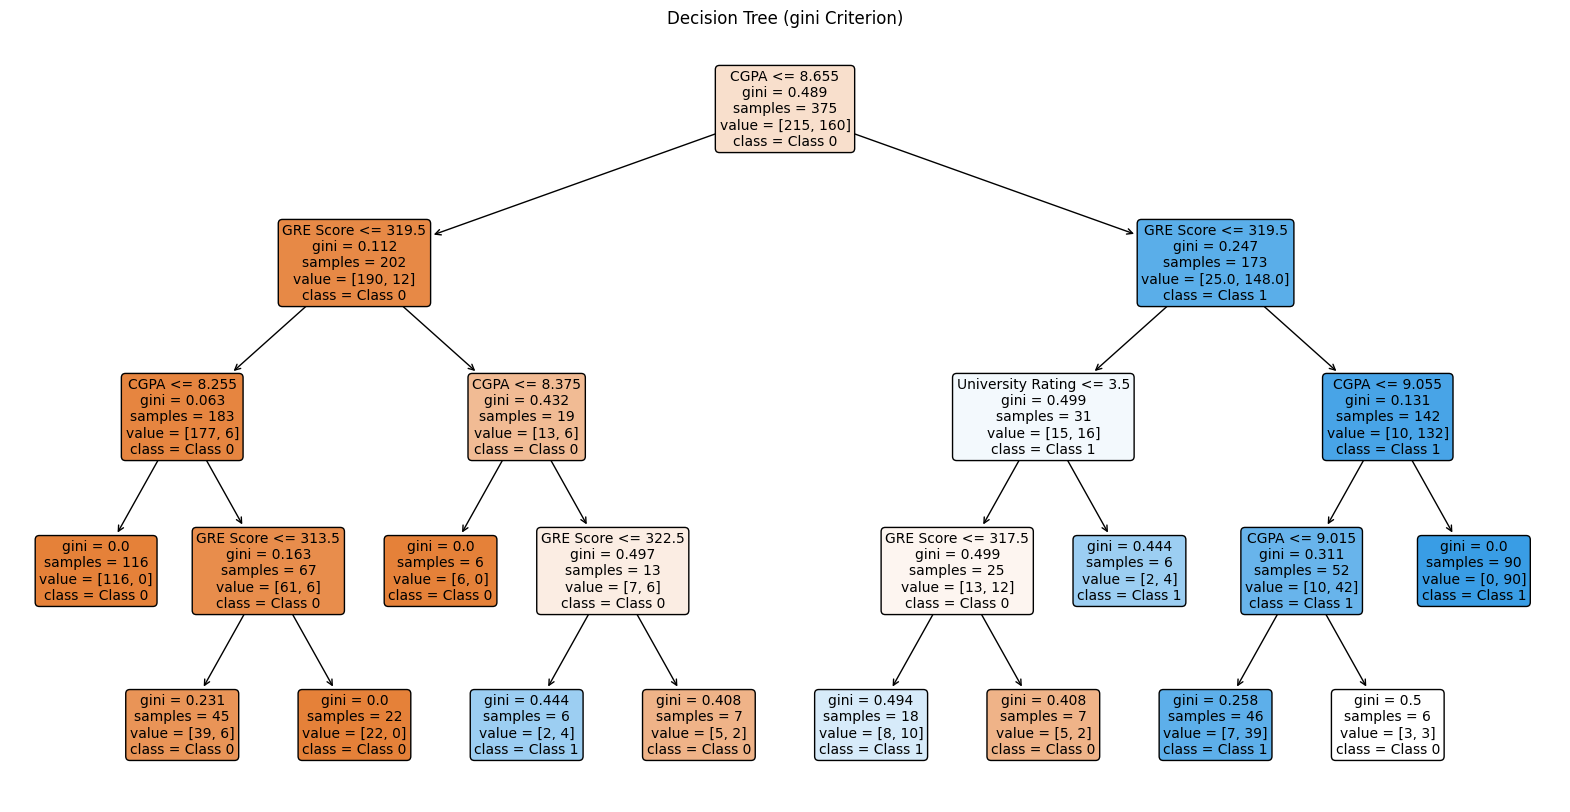

In [148]:
# Function to train and evaluate with additional parameters to control tree size


import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn import tree

def display_results(results, x_train, y_train, x_test, y_test):
    # Display evaluation metrics
    print(f"Criterion: {results['criterion']}")
    print(f"Training Accuracy: {results['train_accuracy']}")
    print("Training Classification Report:")
    print(results['train_report'])

    print(f"Testing Accuracy: {results['test_accuracy']}")
    print("Testing Classification Report:")
    print(results['test_report'])

    # Display confusion matrices for training and testing data
    fig, ax = plt.subplots(1, 2, figsize=(15, 5))  # Create side-by-side subplots

    # Training Confusion Matrix
    ConfusionMatrixDisplay.from_estimator(
        results['model'], 
        x_train, 
        y_train, 
        ax=ax[0], 
        display_labels=['Class 0', 'Class 1'],  # Adjust labels accordingly
        cmap='Blues',
        colorbar=False
    )
    ax[0].set_title("Training Confusion Matrix")

    # Testing Confusion Matrix
    ConfusionMatrixDisplay.from_estimator(
        results['model'], 
        x_test, 
        y_test, 
        ax=ax[1], 
        display_labels=['Class 0', 'Class 1'],  # Adjust labels accordingly
        cmap='Blues',
        colorbar=False
    )
    ax[1].set_title("Testing Confusion Matrix")

    plt.show()

    # Plot the decision tree
    plt.figure(figsize=(20, 10))  # Adjust the size as needed
    tree.plot_tree(
        results['model'],
        filled=True,               # Color nodes based on classification
        feature_names=x_train.columns,  # Names of features (if using DataFrame)
        class_names=['Class 0', 'Class 1'],  # Customize class names if needed
        rounded=True,
        fontsize=10
    )
    plt.title(f"Decision Tree ({results['criterion']} Criterion)")
    plt.show()

# Display results for the pruned Gini index tree
#display_results(pruned_gini_results, x_train, y_train, x_test, y_test)

def train_and_evaluate_pruned(criterion, x_train, y_train, x_test, y_test):
    # Adjusting parameters to prune the tree
    model = DecisionTreeClassifier(
        criterion=criterion,
        max_depth=4,               # Set a maximum depth to control tree size
        min_samples_split=10,      # Minimum samples needed to split a node
        min_samples_leaf=5,        # Minimum samples needed at a leaf node
        random_state=14
    )
    model.fit(x_train, y_train)

    # Predict on training and testing data
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)

    # Evaluation metrics for training data
    train_accuracy = accuracy_score(y_train, y_train_pred)
    train_conf_matrix = confusion_matrix(y_train, y_train_pred)
    train_report = classification_report(y_train, y_train_pred)

    # Evaluation metrics for testing data
    test_accuracy = accuracy_score(y_test, y_test_pred)
    test_conf_matrix = confusion_matrix(y_test, y_test_pred)
    test_report = classification_report(y_test, y_test_pred)

    return {
        "criterion": criterion,
        "model": model,
        "train_accuracy": train_accuracy,
        "train_conf_matrix": train_conf_matrix,
        "train_report": train_report,
        "test_accuracy": test_accuracy,
        "test_conf_matrix": test_conf_matrix,
        "test_report": test_report,
    }

# Train and evaluate the pruned Decision Tree using Gini index
pruned_gini_results = train_and_evaluate_pruned('gini', x_train, y_train, x_test, y_test)

# Train and evaluate the pruned Decision Tree using Entropy
pruned_entropy_results = train_and_evaluate_pruned('entropy', x_train, y_train, x_test, y_test)

# Display results for the pruned Gini index tree
display_results(pruned_gini_results, x_train, y_train, x_test, y_test)




Criterion: entropy
Training Accuracy: 0.9093333333333333
Training Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.95      0.92       215
           1       0.93      0.85      0.89       160

    accuracy                           0.91       375
   macro avg       0.91      0.90      0.91       375
weighted avg       0.91      0.91      0.91       375

Testing Accuracy: 0.872
Testing Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.93      0.90        75
           1       0.89      0.78      0.83        50

    accuracy                           0.87       125
   macro avg       0.88      0.86      0.86       125
weighted avg       0.87      0.87      0.87       125



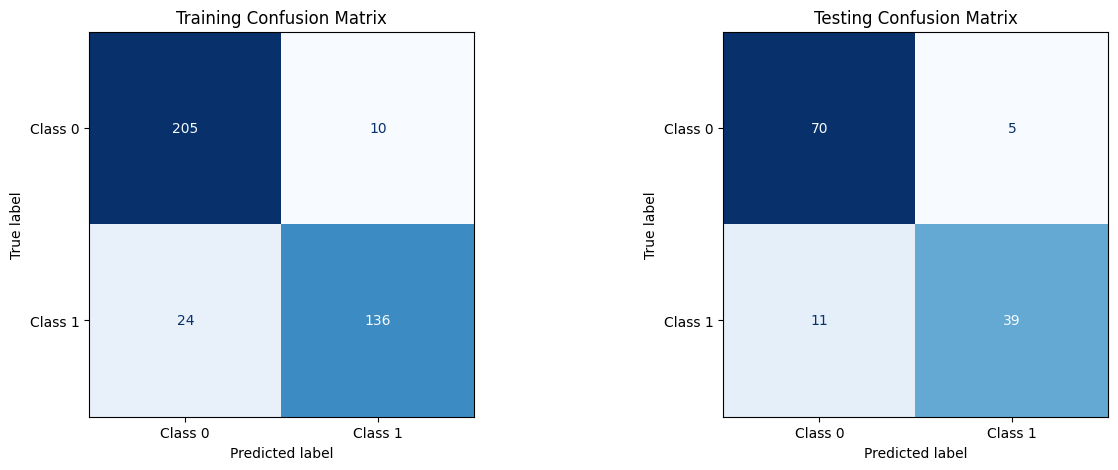

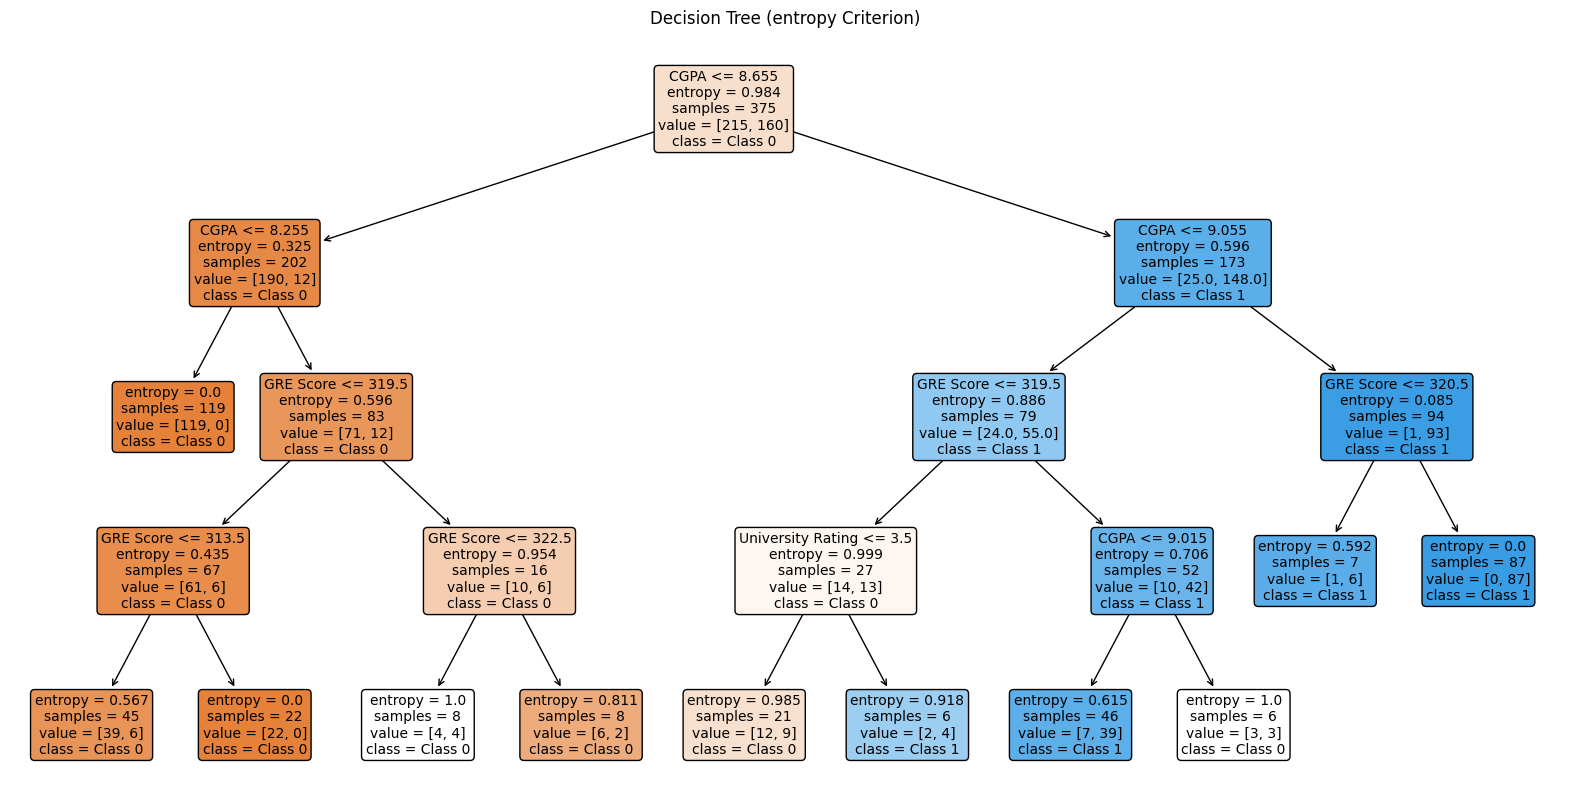

In [149]:

# Display results for the pruned Entropy tree
display_results(pruned_entropy_results, x_train, y_train, x_test, y_test)